In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import random

from os import listdir
from os.path import isfile, join

%matplotlib inline

In [2]:
def get_hist(image):
    hist, bins = np.histogram(img.ravel(), 256, [0, 256])
    mids = (bins[1:] + bins[:-1]) / 2
    
    return hist, mids

In [3]:
def plot_random_hist(file_list, nrows, ncolumns):
    """
    NOTE: random list can have repeats of same file
    """
    rand_list = random.choices(file_list, k = nrows * ncolumns)
    img_list = [mpimg.imread(file) for file in rand_list]
    fig, ax = plt.subplots(nrows, ncolumns, figsize = (14, 12))
    for i, axis in enumerate(ax.ravel()):
        axis.hist(img_list[i].ravel(), 256, [0, 256])

In [4]:
def plot_random(file_list, nrows, ncolumns):
    """
    NOTE: random list can have repeats of same file
    """
    rand_list = random.choices(file_list, k = nrows * ncolumns)
    img_list = [mpimg.imread(file) for file in rand_list]
    fig, ax = plt.subplots(nrows, ncolumns, figsize = (14, 12))
    for i, axis in enumerate(ax.ravel()):
        axis.imshow(img_list[i])

In [26]:
mypath = r'Films_Coated_Surface'
file_list = [f'{mypath}\{i}' for i in listdir(mypath) if isfile(join(mypath, i))]
print (f'num files = {len(file_list)}')

num files = 309


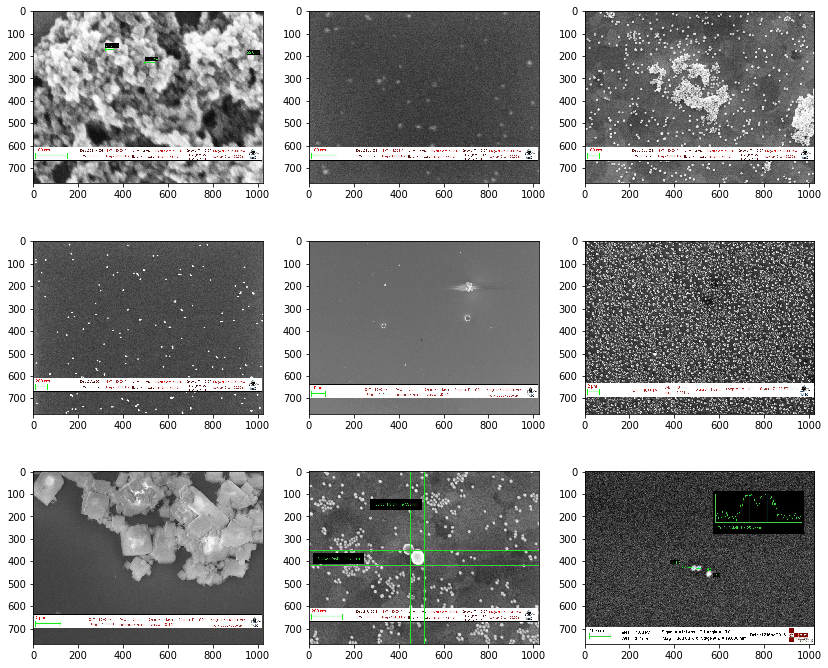

In [8]:
plot_random(file_list, 3, 3)

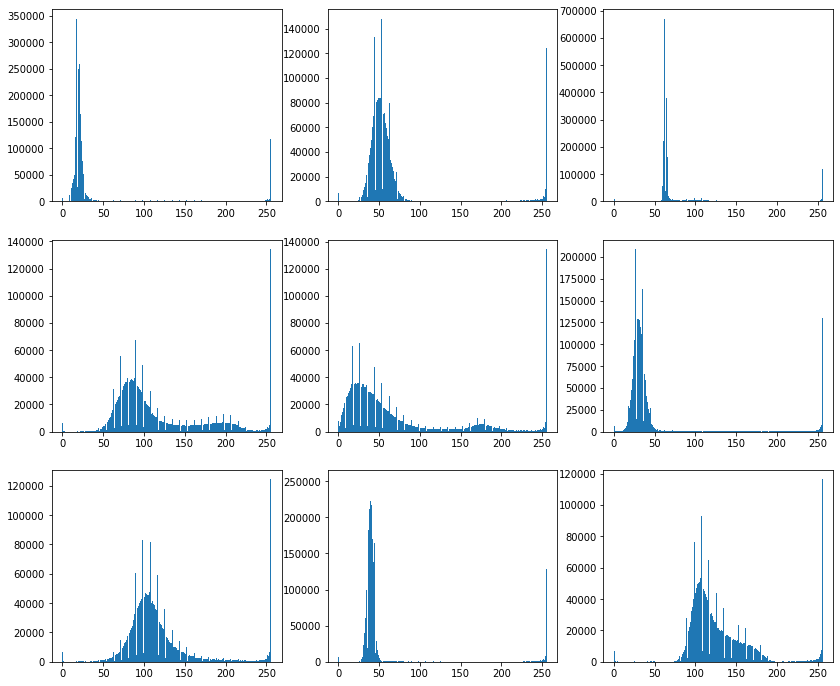

In [11]:
plot_random_hist(file_list, 3, 3) #histograms displayed do not correspond to images shown in previous cell

In [27]:
img_list = [mpimg.imread(file) for file in file_list]

mean_list, std_list = [], []
for img in img_list:
    hist, mids = get_hist(img)
    hist_mean = np.average(mids, weights = hist)
    hist_std = np.sqrt(np.average((mids - hist_mean) ** 2, weights = hist))
    
    mean_list.append(int(hist_mean))
    std_list.append(int(hist_std))

In [28]:
mean_array = np.array(mean_list)
std_array = np.array(std_list)
print (f'average mean from histogram = {mean_array.mean()}')
print (f'average std from histogram = {mean_array.std()}')

average mean from histogram = 139.38834951456312
average std from histogram = 32.368799055449664


In [29]:
outlier_files = []
for i, std in enumerate(std_array):
    if np.abs(std - std_array.mean()) > (2 * std_array.std()):
        print (f'index = {i}, std = {std}')
        outlier_files.append(file_list[i])
print (f'\nnum outliers = {len(outlier_files)}')

index = 7, std = 81
index = 59, std = 65
index = 74, std = 20
index = 100, std = 66
index = 105, std = 65
index = 133, std = 65
index = 173, std = 64
index = 175, std = 26
index = 200, std = 66
index = 203, std = 68
index = 207, std = 64
index = 259, std = 64
index = 296, std = 65

num outliers = 13


IndexError: list index out of range

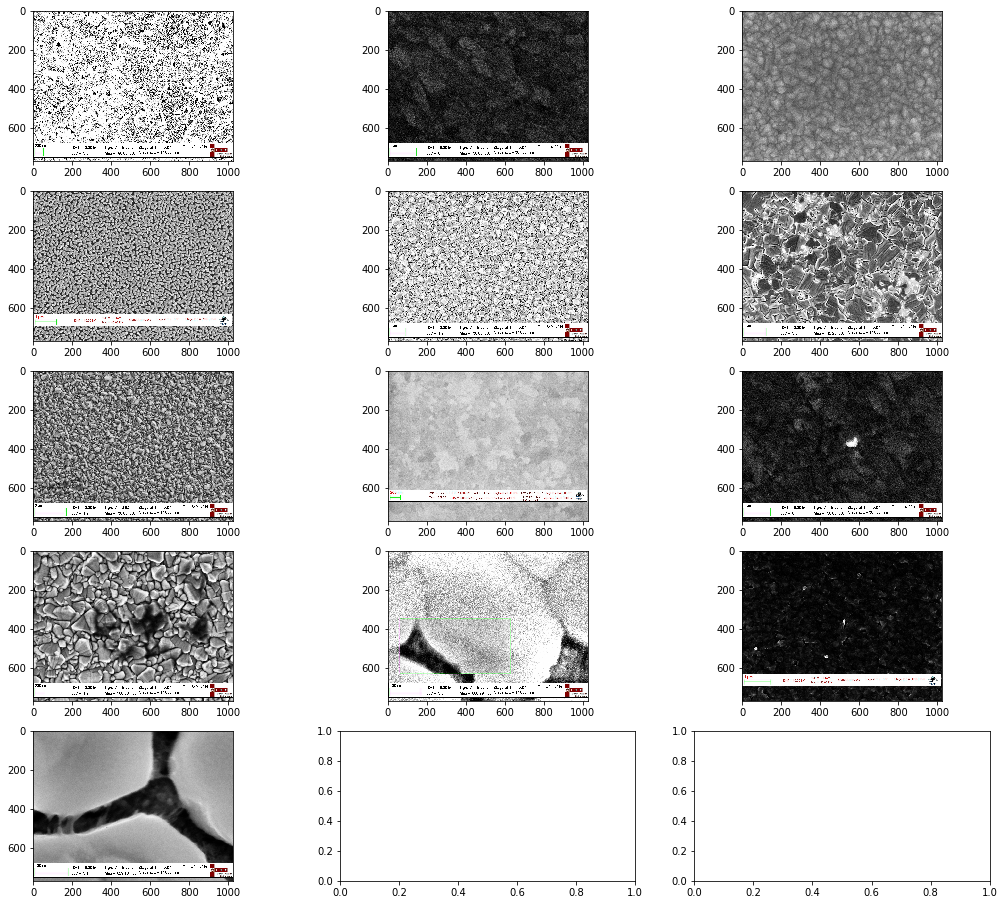

In [30]:
if len(outlier_files) < 18:
    fig, ax = plt.subplots(int(np.ceil(len(outlier_files) / 3)), 3, figsize = (18, 16))
    for i, axis in enumerate(ax.ravel()):
        image = mpimg.imread(outlier_files[i])
        axis.imshow(image)
else: 
    plot_random(outlier_files, 3, 3)

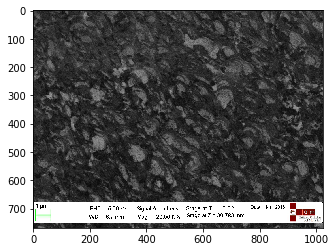

In [25]:
image = mpimg.imread(file_list[239])
plt.imshow(image)